# Introduction to Fourier Series and Transforms

**Student Version**

### This notebook contains both class and exercice materials. Classes material will be written in black, examples in <font color='blue'>blue<font>, <font color='black'><font>and problems to solve in <font color='red'>red.</font>
<!-- (http://ciera.northwestern.edu/Education/LSSTC_DSFPOverview.php). This preamble to the notebook contains an overview of the problems with a brief introduction to the big picture behind the problem. 

For some example notebooks, take a look at AAM's problems on [Unsupervised Machine Learning](https://github.com/LSSTC-DSFP/LSSTC-DSFP-Sessions/blob/master/Session1/Day4/IntroToMachineLearning.ipynb) and [Building An End-to-end Machine Learning Pipeline]().

*Note - tips and suggestions based on AAM's experience developing problems for the DSFP are italicized in this notebook. Otherwise, we typically reserve italics for **hints** on specific problems for the students.*-->

* * *

By L. Bugnet (Flatiron Institute) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
from scipy.fftpack import fft, ifft, rfft
import time
from scipy import signal
from lightkurve import search_targetpixelfile
import lightkurve as lk
import astropy.units as u


%matplotlib notebook
plt.ion()

# Part 1: Fourier Series and signal decomposition


<!-- It is often, though not always, useful to include code that the students run to load data for the notebook. Here is an example to load some columns from SDSS. As this data is required for the exercise, this is not considered a problem. -->

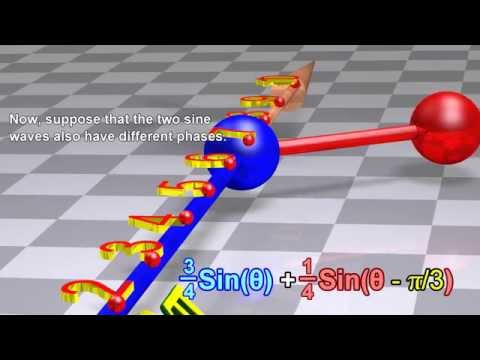

In [2]:
from IPython.display import Audio,Image, YouTubeVideo
id='r18Gi8lSkfM'
YouTubeVideo(id=id,width=1000,height=600)

## Total Fourier Series formula:

<br>

Periodic signal f(x) with period $T=2\pi/\omega$

<br>

\begin{equation}
\boxed{F(x) = A_0 + \sum_{n=1}^\infty A_n \cos(n\omega x -\Phi_n)\,}
\end{equation}

That can be rewritten as:
\begin{equation}
\boxed{F(x) = a_0 + \sum_{n=1}^\infty a_n \cos(n\omega x) + \sum_{n=1}^\infty b_n \sin(n\omega x)\,}
\end{equation}

with 
\begin{equation}
a_0 = \frac{1}{T} \int_0^T f(x)
\end{equation}
\begin{equation}
a_n = \frac{2}{T} \int_0^T f(x)\cos(n \omega x)
\end{equation}
\begin{equation}
b_n = \frac{2}{T} \int_0^T f(x) \sin(n \omega x)
\end{equation}

### <font color='blue'>Example 1.1: Approximate f with a Fourier Series</font>
<font color='blue'>\begin{equation}
f(x) =
    \begin{cases}
      1 & \text{0<x<$\pi$ $[2\pi]$}\\
      0 & \text{$\pi$<x<2$\pi$ $[2\pi]$}
    \end{cases}       
\end{equation}</font>
<font color='blue'>f is periodic of Period $T=2\pi$, $\omega=1$ so:</font>
    
<font color='blue'>\begin{equation}
    a_0=\frac{1}{T}\int_0^\pi 1 {\rm d}x \left(+\frac{1}{T}\int_\pi^{2\pi} 0 {\rm d}x\right) = \frac{1}{2}
    \end{equation}</font>
    
<font color='blue'>\begin{equation}
    a_n=\frac{1}{T}\int_0^\pi \cos{n x} {\rm d}x = \frac{\sin{n\pi}}{n\pi}
    \end{equation}</font>

<font color='blue'>\begin{equation}
    b_n=\frac{1}{T}\int_0^\pi \sin{n x} {\rm d}x = \frac{1-\cos{n\pi}}{n\pi}
    \end{equation}</font>
    
<font color='blue'>Let's try to approximate $f$ by:</font>

<font color='blue'>\begin{equation}
    F(x)=\frac{1}{2}+\sum_{n=1}^\infty\left(\frac{\sin{n\pi}}{n\pi}\cos(nx) +\frac{\sin{n\pi}}{n\pi}\sin(nx)\right)
    \end{equation}</font>



<IPython.core.display.Javascript object>


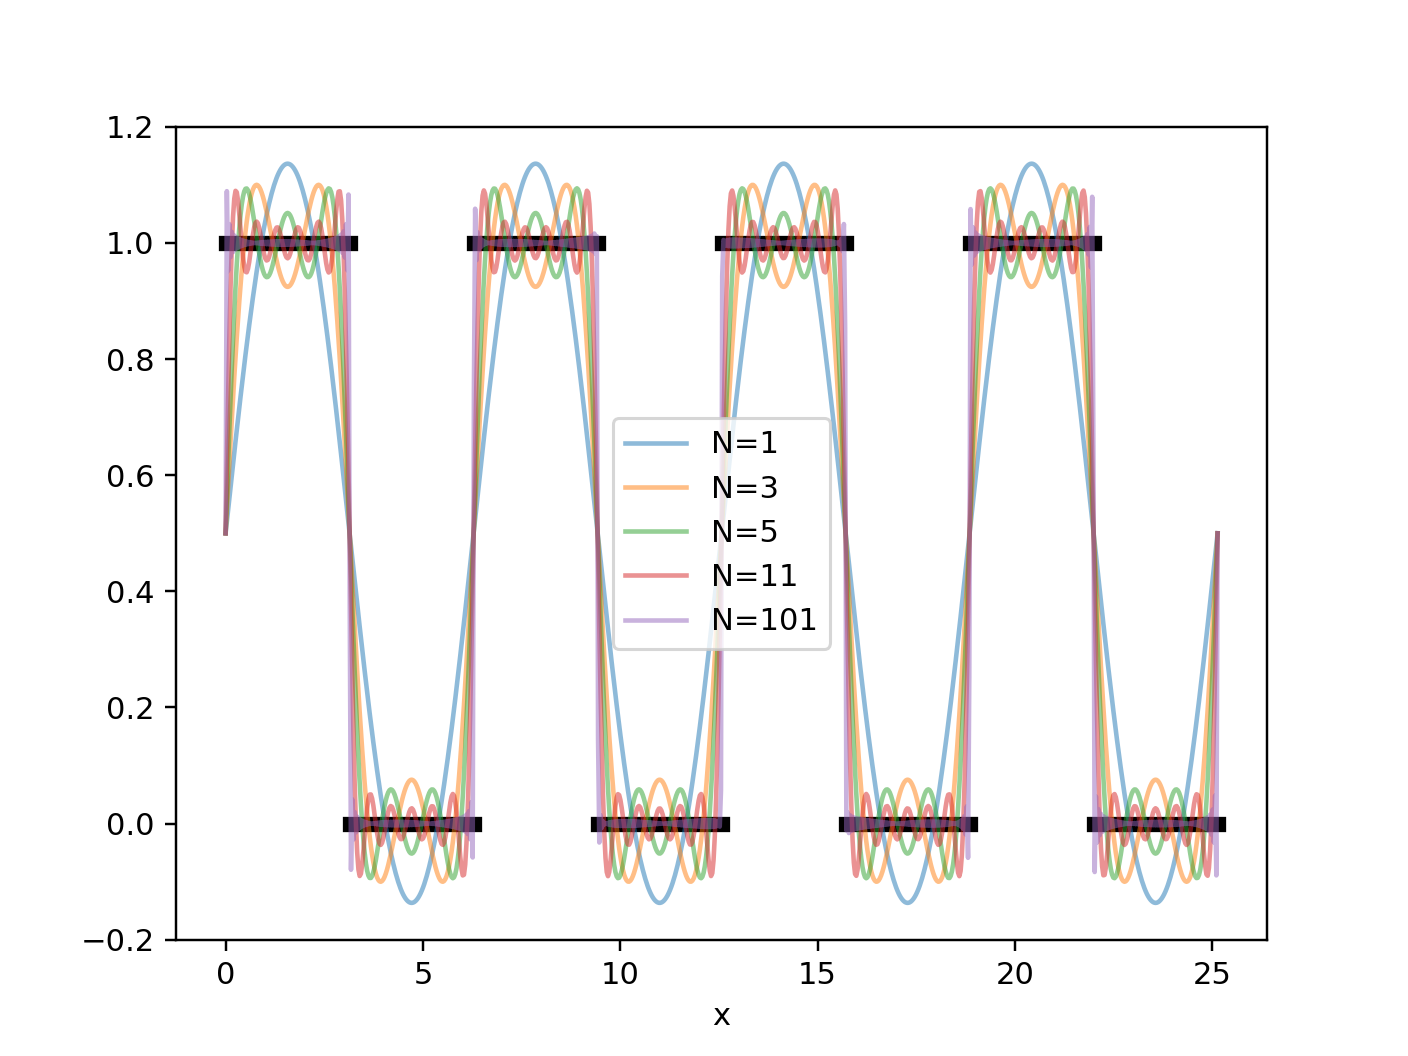

In [3]:
#Plot f over 3T-wide intervals:
x1=np.linspace(0, np.pi, 100)
x2=np.linspace(np.pi, 2*np.pi, 100)

plt.figure()
for ii in range(0,4):
    plt.plot(x1+2*np.pi*ii, np.ones(len(x1)), color='k', lw=5)
    plt.plot(x2+2*np.pi*ii, np.zeros(len(x2)), color='k', lw=5)
    
#Overplot Fourier Serie F:
x = np.linspace(0, 8*np.pi, 800)
a0=1./2.
Na = [ 1, 3, 5, 11, 101] #number of sine function to consider in the Fourier Serie

#Fucntion that calculates F from a0, an, bn:
def f_N(x,N, a0):
    na = range(1,N+1,2)
    f_N = np.zeros(x.shape)+a0
    for n in na:
        an = np.sin(n*np.pi)/(n*np.pi)
        bn = (1-np.cos(n*np.pi))/(n*np.pi)
        f_N += an*np.cos(n*x) + bn*np.sin(n*x)
    return f_N
    
    
for N in Na:
    plt.plot(x,f_N(x,N, a0),label='N={}'.format(N), alpha=0.5)
plt.xlabel('x')
plt.legend(loc='best')


### <font color='blue'>Example 1.2: Approximate continuous function with a Fourier Series</font>
<font color='blue'>\begin{equation}
f(x) =x(1-x)\,\text{with } 0<x<1  
\end{equation}<font>






<IPython.core.display.Javascript object>


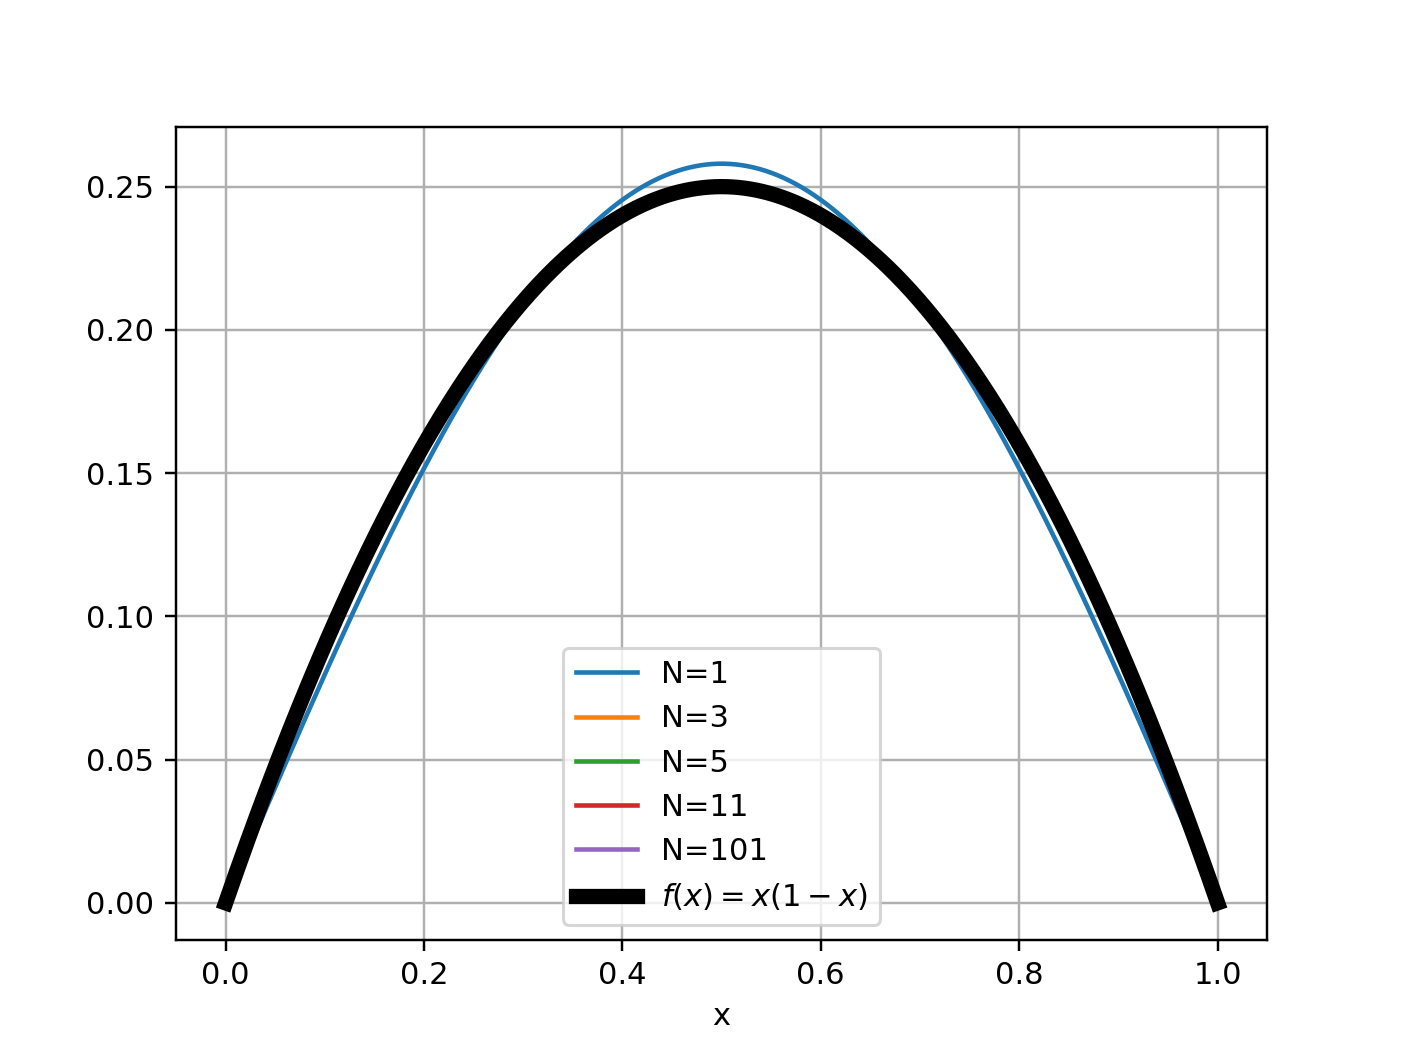

In [4]:
x = np.linspace(0,1,1000)

# small python function to define the partial sum for the truncated Fourier Series f_N
def f_N(x,N):
    """
    small python function to define the partial sum for the truncated Fourier Series f_N
    """
    na = range(1,N+1,2)
    f_N = np.zeros(x.shape)
    for n in na:
        f_N += 8/((n*np.pi)**3)*np.sin(n*np.pi*x) 
    return f_N

# And make a figure showing f_N for increasing values of N
Na = [ 1, 3, 5, 11, 101]

plt.figure()
for N in Na:
    plt.plot(x,f_N(x,N),label='N={}'.format(N))
plt.plot(x,x*(1-x),'k',label='$f(x)=x(1-x)$', lw=5)
plt.xlabel('x')
plt.legend(loc='best')
plt.grid()
plt.show()

### <font color='blue'>Example 1.3: Approximate 2D function with a Fourier Series</font>
<!-- \begin{equation}
f(x) =x(1-x)\,\text{with } 0<x<1  
\end{equation} -->
<!-- <font color='green'>f is periodic of Period $T=1$, so:</font>
    
\begin{equation}
    a_0=\frac{1}{T}\int_0^\pi 1 {\rm d}x \left(+\frac{1}{T}\int_\pi^{2\pi} 0 {\rm d}x\right) = \frac{1}{2}
    \end{equation}
    
\begin{equation}
    a_n=\frac{1}{T}\int_0^\pi \cos{n\omega x} {\rm d}x = \frac{\sin{n\pi}}{n\pi}
    \end{equation}

\begin{equation}
    b_n=\frac{1}{T}\int_0^\pi \sin{n\omega x} {\rm d}x = \frac{1-\cos{n\pi}}{n\pi}
    \end{equation}
    
<font color='green'>Let's try:</font> -->



interactive(children=(IntSlider(value=5, description='m_terms', max=500, min=1), IntSlider(value=5, descriptio…

<IPython.core.display.Javascript object>


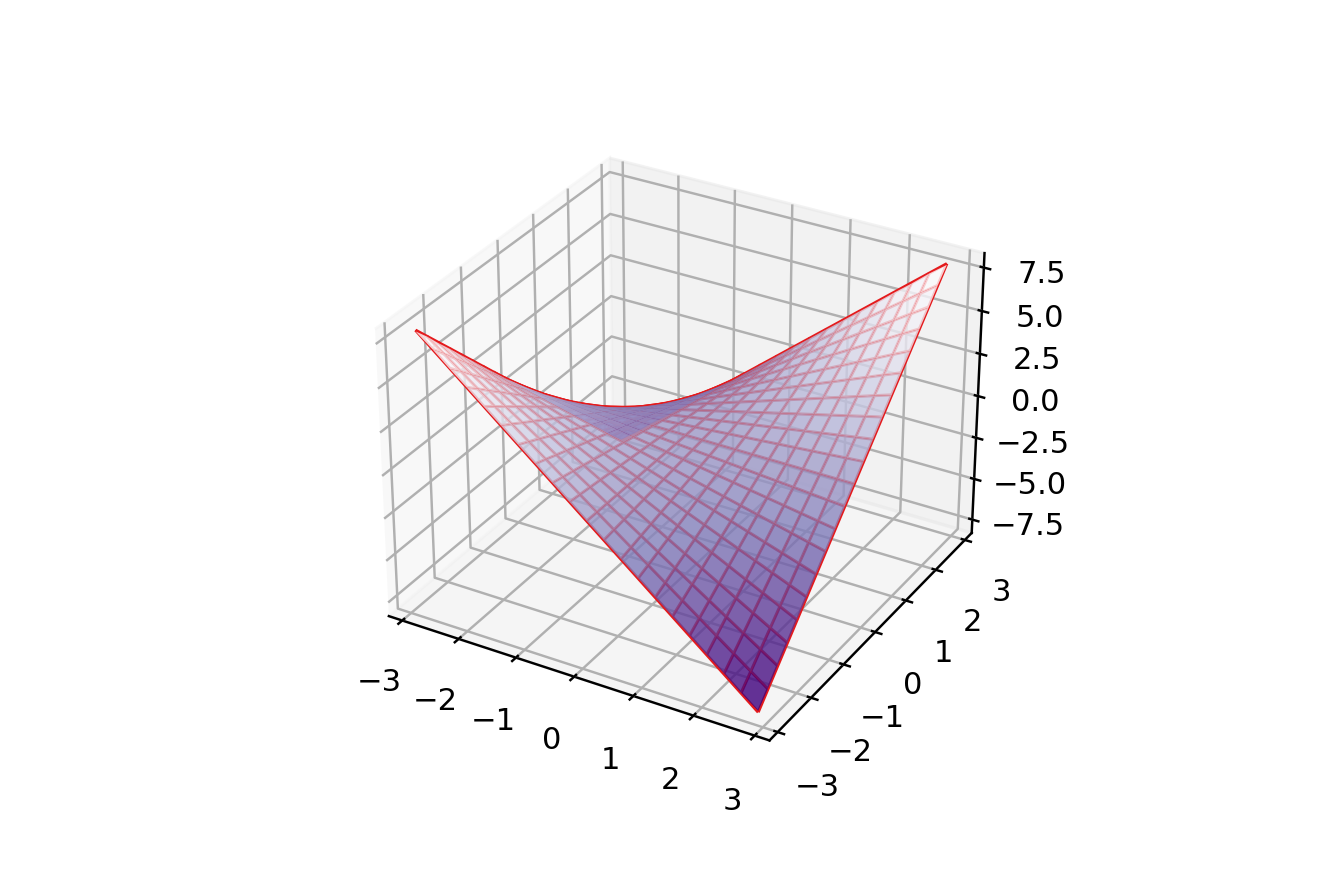

In [5]:
def fourier2D_xy(m_terms=5, n_terms=5):
    """Plot the 2D Fourier approximation for a hyperbolic paraboloid
    
    m_terms, and n_terms are the number of terms in x and y.
    
    The values are padded to be between [-0.9 pi, 0.9 pi] to avoid the
    discontinuities in the border of the domain.
    """
    Y, X = 0.9*np.pi * np.mgrid[-1:1:21j, -1:1:21j]
    XY = np.zeros_like(X)
    for cont_x in range(1, m_terms + 1):
        for cont_y in range(1, n_terms + 1):
            XY = XY + (-1)**(cont_x + cont_y) * \
                np.sin(cont_x*X) * np.sin(cont_y*Y)/(cont_x*cont_y)
    
    XY = 4*XY
    
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, XY, cmap="Purples_r", cstride=1, rstride=1, alpha=0.8,
                   lw=0.2)
    ax.plot_wireframe(X, Y, X*Y, cstride=1, rstride=1, color="#e41a1c",
                     linewidth=1)


interact(fourier2D_xy,
     m_terms=(1, 500),
     n_terms=(1, 500));

interact(fourier2D_xy(m_terms=500, n_terms=500),
     m_terms=(1, 500),
     n_terms=(1, 500));

Visit link for visual interpretation of signal from sin/cos: https://www.geogebra.org/m/ztn2du2a


### <font color='purple'>What if the signal f is not periodic?<font>
    
* #### Fourier series

Periodic function => converts into a discrete exponential or sine and cosine function.
    
Non-periodic function => not applicable
* #### Fourier transform

Periodic function => converts its Fourier series in the frequency domain.
    
Non-Periodic function => converts it into continuous frequency domain.
    


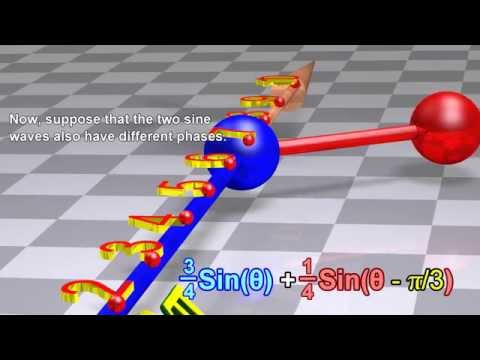

In [6]:
from IPython.display import Audio,Image, YouTubeVideo
id='r18Gi8lSkfM'
YouTubeVideo(id=id,width=1000,height=600)
# start at 9:11

# Part 2: Fourier Transforms

"The Fourier transform is a way of splitting something up into a bunch of sine waves"

#### Fourier transform of a function f definition:
\begin{equation}
\boxed{F(\nu) = \int_{-\infty}^{\infty} f(x)e^{-2\pi i\nu x} {\rm d}x}
\end{equation}

### <font color='blue'>Example 2.1: Get the fourier transform of f</font>
 <font color='blue'>\begin{equation}
f(x) = \cos(2\pi 3x)
\end{equation}</font>

<IPython.core.display.Javascript object>


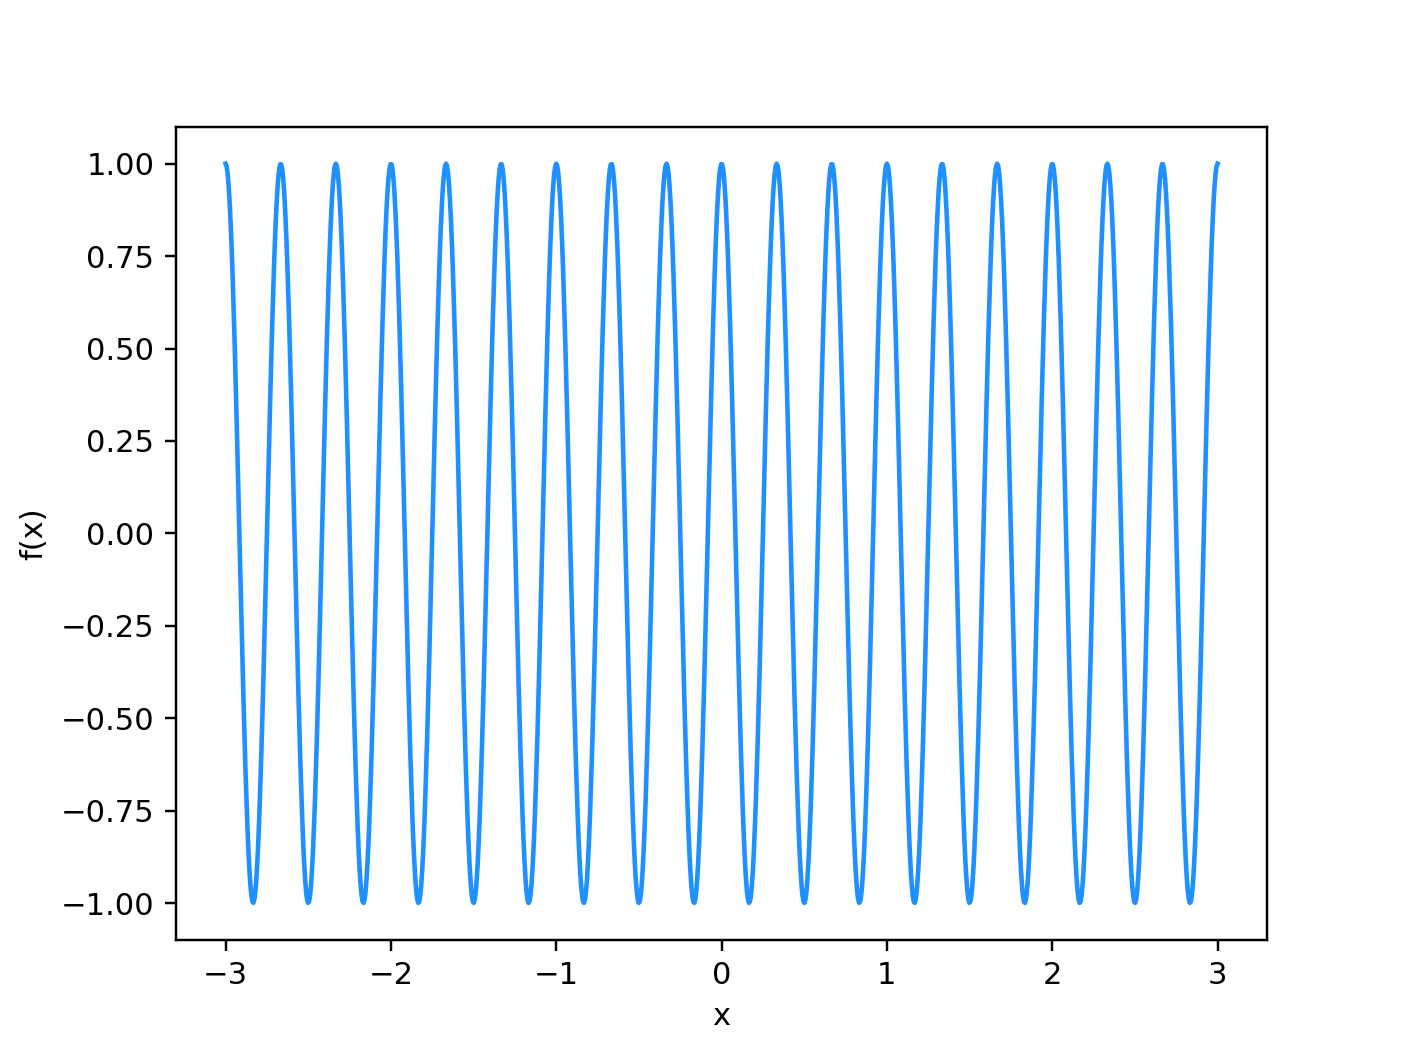

Text(0, 0.5, 'f(x)')

In [7]:
#plot function f:
x = np.linspace(-3,3, 1000)
plt.figure()
plt.plot(x,np.cos(2*np.pi*x*3), alpha=1 , color='dodgerblue')
plt.xlabel('x')
plt.ylabel('f(x)')

<font color='blue'>f is periodic of known period $T=\frac{1}{3}$. Let's calculate recover this periodicity by using the Fourier transform of f:</font>
<br>
<font color='blue'>
\begin{equation}
    F(\nu) = \int_{-\infty}^{\infty}\cos(2\pi 3x)e^{-2\pi i \nu x}{\rm d}x
    \end{equation}</font>
<font color='blue'>    
\begin{equation}
    F(\nu) = \int_{-\infty}^{\infty}\left(\frac{e^{2\pi i 3 x}+e^{-2 \pi i 3 x}}{2}\right)e^{-2\pi i \nu x}{\rm d}x
    \end{equation}</font>
<font color='blue'>
\begin{equation}
    F(\nu) = \int_{-\infty}^{\infty}\left(\frac{e^{2\pi i (3 x-\nu x)}+e^{-2 \pi i (3 x + \nu x)}}{2}\right){\rm d}x
    \end{equation}</font>
<br>
<font color='blue'>    
\begin{equation}
\boxed{F(\nu) = \frac{1}{2}\left(\delta\left(\nu-3)\right) +\delta\left(\nu+3\right)\right)}
\end{equation}</font>
    
<font color='blue'>The Fourier transform of $f(x) = \cos(2\pi 3x)$ is zero except at the frequency $\nu=3$ (and $\nu =-3$ not acceptable for most physical problems), corresponding to a periodicity of $T=\frac{1}{\nu}=\frac{1}{3}$</font>

### As shown by this example, if the function is periodic the Fourier transform is a sum of Dirac positionned at the different frequencies.


### <font color='red'>Problem 2.2: Get the fourier transform of f</font>
 <font color='red'>\begin{equation}
f(x) = \sin(2\pi 3x)
\end{equation}</font>

<font color='red'>Enter details of calculation here!</font>


Solution:

<font color='black'>    
\begin{equation}
F(\nu) = \frac{1}{2i}\left(\delta\left(\nu-3)\right) +\delta\left(\nu+3\right)\right)
\end{equation}</font>
    



### Conclusion:
* ### Even functions have Real Fourier Series
* ### Odd functions have Imaginary Fourier Series

* ### In general, we use the absolute value of the FT to take into account both odd and even components in the function: |FT|

<img src="images/maxresdefault.jpg" width="750" align="center">




### <font color='purple'>What if the function is not periodic?</font>  

### <font color='red'>Problem 2.3: Fourier transform of Periodic VS non-periodic function</font>  
    
<font color='red'>Represent the following functions:</font>   

<font color='red'>
\begin{equation}
f_1(x) = \sin(6\pi x)
\end{equation}

</font>

<font color='red'>
\begin{equation}
f_2(x) = \sin(6\pi x)e^{-2\pi x}
\end{equation}

</font>



<IPython.core.display.Javascript object>


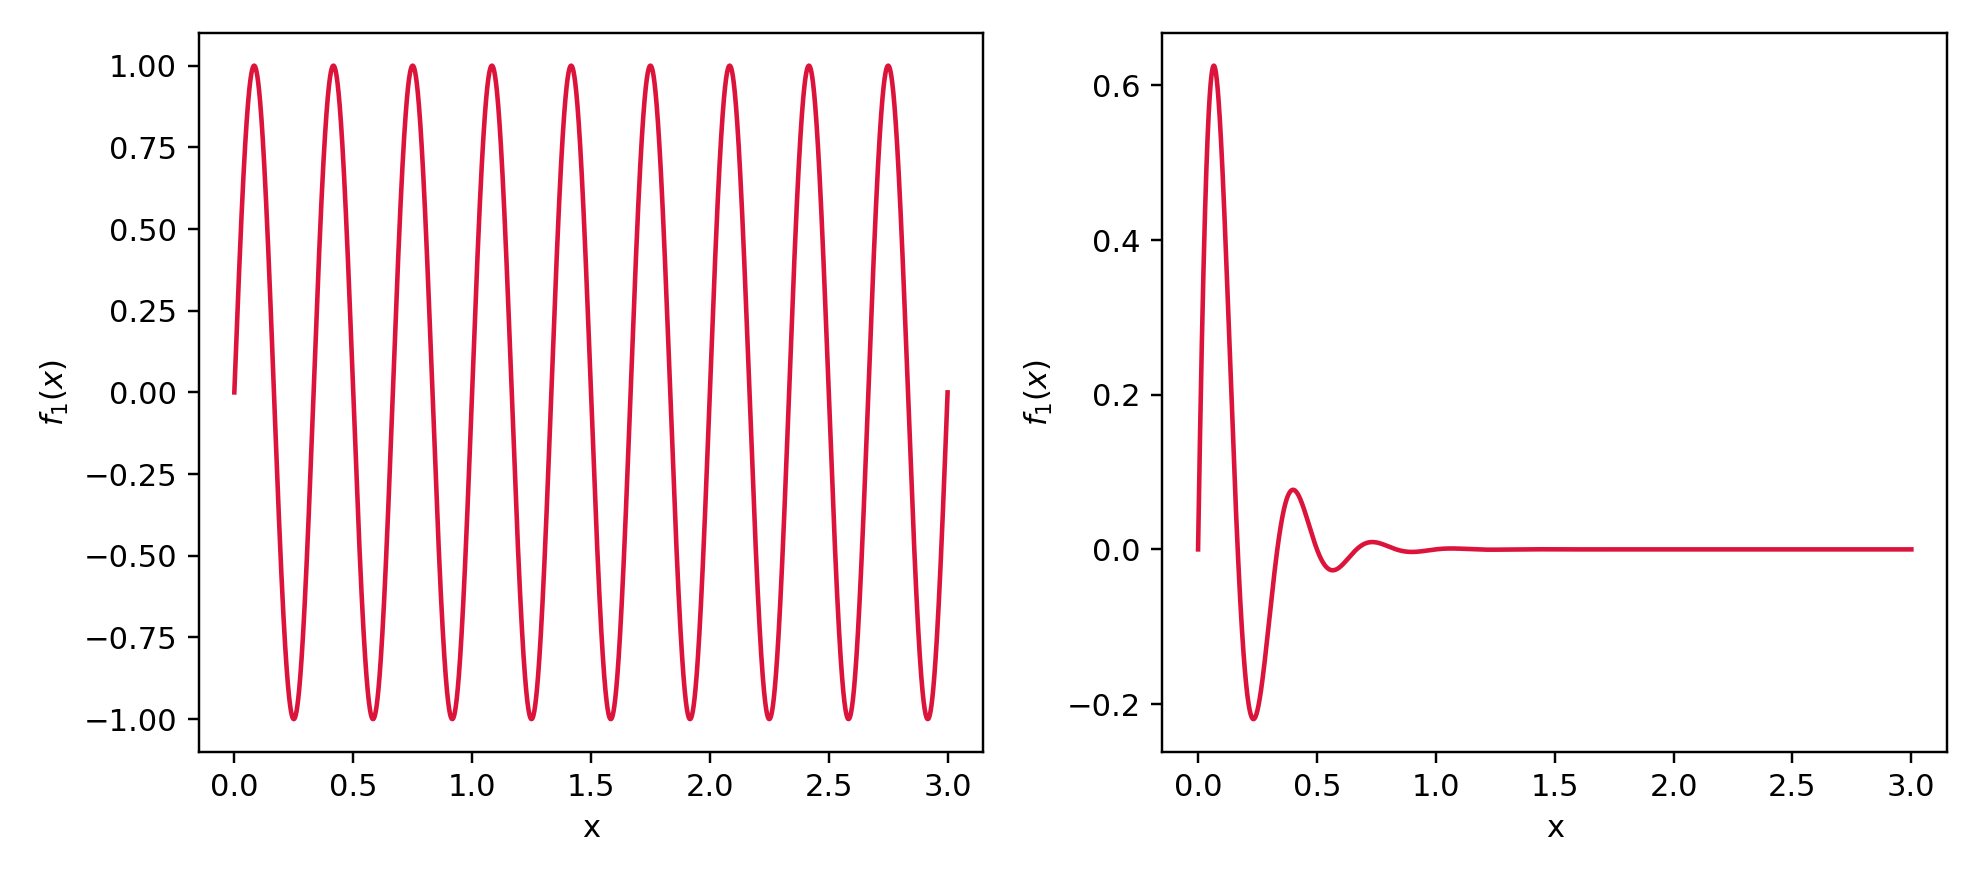

In [9]:
x = np.linspace(0,3, 10000)
fig, ax = plt.subplots(1,2, figsize=(9,4))

#plot function f1:
ax[0].plot(x,np.sin(6*np.pi*x), alpha=1 , color='crimson')

ax[0].set_xlabel('x')
ax[0].set_ylabel(r'$f_1(x)$')

#plot function f2:
ax[1].plot(x,np.sin(6*np.pi*x)*np.exp(-2*np.pi*x), alpha=1 , color='crimson')

ax[1].set_xlabel('x')
ax[1].set_ylabel(r'$f_1(x)$')

plt.tight_layout();



<font color='red'>and represent their fourier transforms:<font>

<font color='red'>    
\begin{equation}
F_1(\nu) = \frac{1}{2i}\left(\delta\left(\nu-3)\right) +\delta\left(\nu+3\right)\right)
\end{equation}</font>
    
<font color='red'>\begin{equation}
F_2(\nu) = \frac{6 \pi}{(2\pi+2\pi\nu i)^2+(6\pi)^2}
\end{equation}<font>

In [ ]:
nu = np.linspace(0,50, 10000)

#we approximate FT1 with:
FT1 = np.zeros(10000)
FT1[np.where(np.abs(nu-(3))==np.min(np.abs(nu-3)))]=1

#plot FT1:
fig, ax = plt.subplots(1,2, figsize=(9,4))
ax[0].plot(nu, np.abs(FT1), color='crimson')
wh1 = np.argmax(np.abs(FT1))
ax[0].plot(nu[wh1], np.abs(FT1)[wh1], '+', color='crimson', markersize=10)
ax[0].set_xlabel(r'$\nu$')
ax[0].set_ylabel(r'F($\nu$)')

#plot FT2
FT2 = #------TO FILL------
ax[1].plot(#------TO FILL------), color='crimson')
ax[1].set_xlabel(r'$\nu$')
ax[1].set_ylabel(r'F($\nu$)')

#plot maximum of FT2, extract Period of f2
#------TO FILL------
ax[1].plot(#------TO FILL------, '+', color='crimson', markersize=10)

print('T2='+str(#------TO FILL------))

### Conclusion: If the function is not periodic in the time domain, the FT converts it to a continuous function in the frequency domain:



<img src="images/ft.gif" width="750" align="center">



### <font color='purple'>What if the signal is discrete?</font>

# Part 3: Discrete Fourier Transforms (DFT)

Discrete Fourier tranform are used on discrete signals.

\begin{equation}
\boxed{X_k = \sum_{n=0}^{N-1}x_n \displaystyle  e^{\displaystyle -2 i \pi  \frac{kn}{N}}}
\end{equation}

with 
* N = number of samples
* n = current sample
* k = current frequency, where k∈[0,𝑁−1]
* $x_n$ = the sine value at sample n
* $X_k$ = The DFT which include information of both amplitude and phase:


\begin{equation}
A = \frac{|X_k|}{N}
\end{equation}

\begin{equation}
\Phi = \arctan{\frac{\mathcal{Im}(X_k)}{\mathcal{Re}(X_k)}}
\end{equation}

Visit link for visual interpretation of Discrete Fourier transform: https://www.geogebra.org/m/ztn2du2a



### <font color='red'>Problem 3.1: Write a function DFT(x) which takes in one argument, x - input 1 dimensional real-valued signal. The function will calculate the DFT of the signal and return the DFT values. <font>

In [11]:
### Solution:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """
    N = len(x)
    n = np.arange(N)
    k = n.reshape(N, 1)
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e,x)
    
    return X

<font color='red'>Apply this DFT function to the discrete signal generated by $f(x) = \sin(6\pi x)e^{-2\pi x}$ (see above) with a sampling rate of 1000 (x=np.linspace(0,10,1000)) and plot the result.<font>

<IPython.core.display.Javascript object>


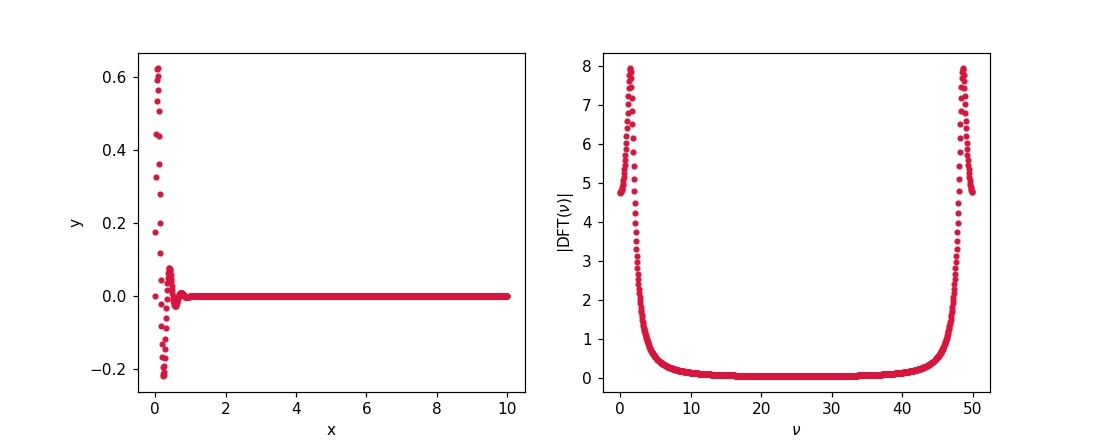

T=0.35750035750035747 (nu)


In [66]:
sr =1000 #sampling rate
x = np.linspace(0,10, sr)
y = np.sin(6*np.pi*x)*np.exp(-2*np.pi* x)
X = DFT(y)
# calculate the frequencies associated with x:
dfreq = 0.1
maxfreq = 1/(2*(x[1]-x[0]))
freq = np.arange(0,maxfreq,maxfreq/sr)


fig, ax=plt.subplots(1,2, figsize=(10,4))
ax[0].plot(x, y, 'o',color='crimson', markersize=3)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].plot(freq, abs(X), 'o',color='crimson', markersize=3)

ax[1].set_xlabel(r'$\nu$')
ax[1].set_ylabel(r'|DFT($\nu$)|')

#calculate Periodicity
#------TO FILL------
print('T='+str(1/(2.*freq[np.argmax(abs(X))])),'(nu)') #------TO FILL------

### <font color='red'>Do you recover $T\approx 0.35$?<font>
    
### <font color='red'>Why is the DFT mirrored?<font>

# Part 4: Fast Fourier Transform

####  Fast Fourier Transforms are a family of algorithm that computes the DFT efficeintly. They are used to reduce the computational time from $\mathcal{O}(N^2)$ to $\mathcal{O}(N\log{N})$
 See https://www.ece.ucdavis.edu/~bbaas/281/papers/CooleyLewisWelch.1967.HistNotesFFT.pdf for details about the different FFT algorithms.
 
Of course, many python packages like scipy and numpy already contain implemented FFT functions, so that you don't have to.


Let's compare the FFT with our DFT function:

<IPython.core.display.Javascript object>


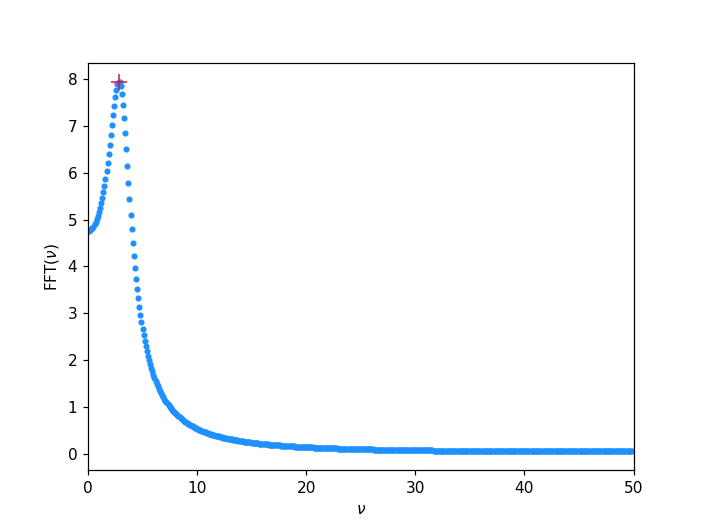

T=0.35750035750035747


In [39]:
#Calculate the FFT of our data
x = np.linspace(0,10, sr)
FFT = np.fft.fft(np.sin(6*np.pi*x)*np.exp(-2*np.pi*x))

#Calculate the associated frequencies
freqs = np.fft.fftfreq(len(x), d=x[1]-x[0])

#Plot FFT
plt.figure()
plt.plot(freqs,np.abs(FFT), 'o', color='dodgerblue', markersize=3)
plt.xlabel(r'$\nu$')
plt.ylabel(r'FFT($\nu$)')
plt.xlim(0,50)
wh = np.argmax(np.abs(FFT))
plt.plot(freqs[wh], np.abs(FFT)[wh], '+', color='crimson', markersize=10)

#Extract dominant frequency
print('T='+str(1/freqs[wh]))


### Is FFT really more efficient than our home made DFT function ?


## <font color='red'>Problem 4.1: Computational time: DFT VS FFT <font>
    
<font color='red'>Compare the computational time of the DFT function and the FFT algorithm on the discrete function $f(x) = \sin(6\pi x)e^{-2\pi x}$ with two different observation cadence:<font>
    
<font color='red'>x = np.linspace(0,10, 1000)<font>

<font color='red'>x = np.linspace(0,10, 10000)<font>




In [49]:
#sampling rate:
import time

x1=np.linspace(0,10,1000)
x2=np.linspace(0,10,10000)

time.time() 
# computation time with our DFT function:
y2 = np.sin(6*np.pi*x2)*np.exp(-2*np.pi* x2)
X2 = DFT(y2)

#------TO FILL------
s1=time.time()
y1 = np.sin(6*np.pi*x1)*np.exp(-2*np.pi* x1)
X1 = DFT(y1)
print('DFT 1000 samples computational time='+ str(time.time()-s1) +' sec')

#increase number of point (*10):
#------TO FILL------
s2=time.time()
y2 = np.sin(6*np.pi*x2)*np.exp(-2*np.pi* x2)
X2 = DFT(y2)
print('DFT 10000 samples computational time='+ str(time.time()-s2) +' sec')

# computation time with FFT
#------TO FILL------
s1 = time.time()
FFT1 = np.fft.fft(np.sin(6*np.pi*x1)*np.exp(-2*np.pi*x1))
freqs1 = np.fft.fftfreq(len(x1), d=x1[1]-x1[0])
print('FFT 1000 samples computational time='+ str(time.time()-s1) +' sec')

#increase number of point (*10):
#------TO FILL------
s2 = time.time()
FFT2 = np.fft.fft(np.sin(6*np.pi*x2)*np.exp(-2*np.pi*x2))
freqs2 = np.fft.fftfreq(len(x2), d=x2[1]-x2[0])
print('FFT 10000 samples computational time='+ str(time.time()-s2) +' sec')




DFT 1000 samples computational time=0.046010732650756836 sec
DFT 10000 samples computational time=5.535221338272095 sec
FFT 1000 samples computational time=0.0006639957427978516 sec
FFT 10000 samples computational time=0.0009090900421142578 sec


### Conclusion: Use FFT algorithms!

# Part 5: Reverse fourier transform:


\begin{equation}
\boxed{f(x)=\int_{-\infty}^{\infty} F(\nu)e^{\displaystyle 2\pi i \nu x}{\rm d}\nu}
\end{equation}

#### Discrete version:

\begin{equation}
\boxed{x_n=\frac{1}{N}\sum_{k=0}^{N-1} X_k e^{\displaystyle i\frac{2\pi}{N}kn}}
\end{equation}

In [ ]:
# Reverse the discrete Fourier transform:
ifft_2 = ifft(FFT)
fig, ax = plt.subplots(1, 2, figsize=(9,4))
ax[0].plot(x, np.sin(6*np.pi*x)*np.exp(-2*np.pi* x), label='f(x)', color='dodgerblue')
ax[0].plot(x, ifft_2, '--', label='iFT(FT(f(x)))', color='crimson')
ax[0].set_xlabel('x')
ax[0].legend()

ax[1].plot(x, np.sin(6*np.pi*x)*np.exp(-2*np.pi* x)-ifft_2, color='dodgerblue')
ax[1].set_xlabel('x')
ax[1].set_ylabel('f(x)-iFT(FT(x))')
plt.tight_layout()


# Part 6: Observation effects

### <font color='blue'>Example 6.1: Calculate the FFT of the sin function defined on the following intervals:<font>

<IPython.core.display.Javascript object>


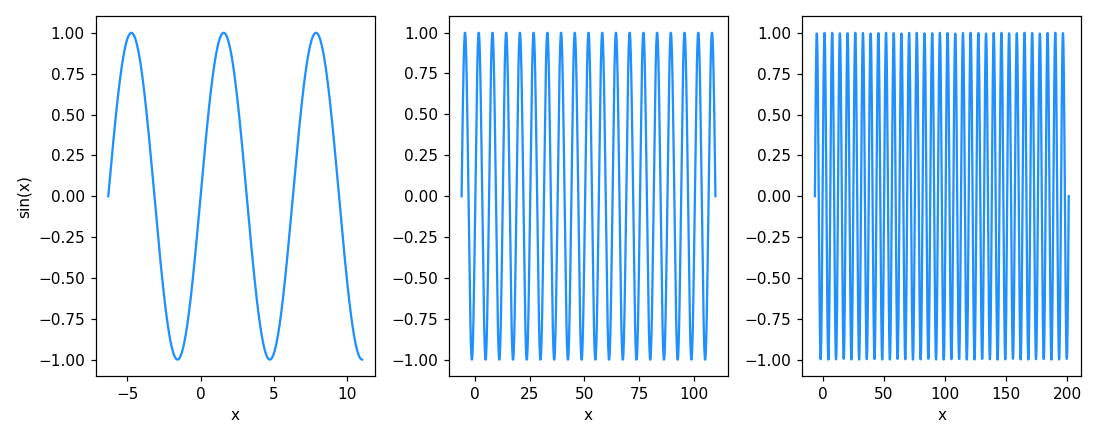

<IPython.core.display.Javascript object>


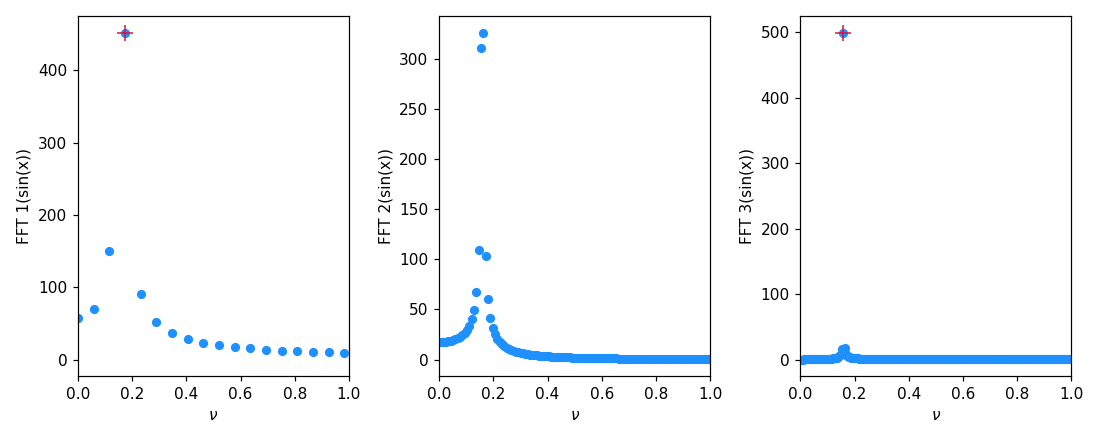

Period from FFT 1 = 5.765351883464832
Period from FFT 2 = -6.123962287699379
Period from FFT 3 = 6.289474781961553
True Period= 6.283185307179586


In [50]:
fig, ax =plt.subplots(1,3, figsize=(10,4))
fig2, ax2 =plt.subplots(1,3, figsize=(10,4))

#1st interval
x1 = np.linspace(-2*np.pi,3.5*np.pi,1000)

y1 = np.sin(x1)
ax[0].plot(x1,y1, color='dodgerblue')
FFT1 = np.fft.fft(y1)
nu1 = np.fft.fftfreq(len(x1), d=x1[1]-x1[0])
ax2[0].plot(nu1, np.abs(FFT1), 'o', color='dodgerblue', markersize=5)
wh1 = np.argmax(np.abs(FFT1))
ax2[0].plot(nu1[wh1], np.abs(FFT1)[wh1], '+', color='crimson', markersize=10)
print('Period from FFT 1 = '+str(1/nu1[wh1]))

#2nd interval
x2 = np.linspace(-2*np.pi,35*np.pi,1000)

y2 = np.sin(x2)
ax[1].plot(x2,y2, color='dodgerblue')
FFT2 = np.fft.fft(y2)
nu2 = np.fft.fftfreq(len(x2), d=x2[1]-x2[0])
ax2[1].plot(nu2, np.abs(FFT2), 'o', color='dodgerblue', markersize=5)
ax2[1].set_xlim(0,1)
wh2 = np.argmax(np.abs(FFT2))
ax2[1].plot(nu2[wh2], np.abs(FFT2)[wh2], '+', color='crimson', markersize=10)
print('Period from FFT 2 = '+str(1/nu2[wh2]))


#3rd interval
x3 = np.linspace(-2*np.pi,64*np.pi,1000)

y3 = np.sin(x3)
ax[2].plot(x3,y3, color='dodgerblue')
FFT3 = np.fft.fft(y3)
nu3 = np.fft.fftfreq(len(x3), d=x3[1]-x3[0])
ax2[2].plot(nu3, np.abs(FFT3), 'o', color='dodgerblue', markersize=5)
wh3 = np.argmax(np.abs(FFT3))
ax2[2].plot(nu3[wh3], np.abs(FFT3)[wh3], '+', color='crimson', markersize=10)
print('Period from FFT 3 = '+str(1/nu3[wh3]))
print('True Period= '+str(2*np.pi))

ax2[0].set_xlim(0,1)
ax2[1].set_xlim(0,1)
ax2[2].set_xlim(0,1)

ax[0].set_xlabel('x')
ax[0].set_ylabel('sin(x)')
ax[1].set_xlabel('x')
ax[2].set_xlabel('x')

ax2[0].set_xlabel(r'$\nu$')
ax2[0].set_ylabel('FFT 1(sin(x))')
ax2[1].set_xlabel(r'$\nu$')
ax2[1].set_ylabel('FFT 2(sin(x))')
ax2[2].set_xlabel(r'$\nu$')
ax2[2].set_ylabel('FFT 3(sin(x))')

fig.tight_layout()
fig2.tight_layout()



### Conclusion:
* The duration of the time serie matters: the longest the time serie, the better the frequency resolution in the FFT (see panel 2 VS panel 3).
* When the number of periods in the acquisition is not an integer, the endpoints are discontinuous. These artificial discontinuities show up in the FFT as high-frequency components not present in the original signal (see panel 1 VS panel 2).

<img src="images/Fast_Fourier_Transform_FFT_Animation_using_Matlab_fourier_ff.gif" width="1000" align="center">



## PSD and amplitudes

Check out how the longer the time series is (and the finer the frequency bin width/step is), the higher the amplitude of the FFT becomes! This means you can't really use FFTs to compare and quantify vibration environments.

Power spectrum densities (PSDs) are normalized to the frequency bin width preventing the duration of the data set (and corresponding frequency step) from changing the amplitude of the result. The definition the power spectral density of a continuous function is the Fourier transform of its auto-correlation function 

\begin{equation}
{\rm PSD}(\nu)=\lim_{T\rightarrow \infty}\frac{1}{T}|{\rm FT}(\nu)|^2
\end{equation}


In [ ]:
rng = np.random.default_rng()
fs = 10e3
N = 1e3
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
f, Pxx_den = signal.welch(x, fs, nperseg=1024)
fig, ax = plt.subplots(2,3, figsize=(9,6))
ax[0,1].semilogy(f, Pxx_den, color='dodgerblue')
ax[0,1].set_ylim([0.5e-3, 1])
ax[0,1].set_xlabel('frequency [Hz]')
ax[0,1].set_ylabel('PSD')
ax[0,2].set_ylabel('FFT')
ax[0,2].plot(np.fft.fftfreq(len(x), d=time[1]-time[0]), np.abs(np.fft.fft(x)), color='dodgerblue')
ax[0,2].set_xlim(0, np.max(np.fft.fftfreq(len(x), d=time[1]-time[0])))
ax[0,0].plot(x, color='dodgerblue', lw=0.1)

N = 1e5
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
f, Pxx_den = signal.welch(x, fs, nperseg=1024)
ax[1,1].semilogy(f, Pxx_den, color='dodgerblue')
ax[1,1].set_ylim([0.5e-3, 1])
ax[1,1].set_xlabel('frequency [Hz]')
ax[1,1].set_ylabel('PSD')
ax[1,2].set_ylabel('FFT')
ax[1,2].plot(np.fft.fftfreq(len(x), d=time[1]-time[0]), np.abs(np.fft.fft(x)), color='dodgerblue')
ax[1,2].set_yscale('log')
ax[1,2].set_xlim(0, np.max(np.fft.fftfreq(len(x), d=time[1]-time[0])))
ax[1,0].plot(x, color='dodgerblue', lw=0.01)
plt.tight_layout()

### <font color='red'>Problem 6.2: Effect of gaps in data<font>
    
<font color='red'> Compare the FFT of the following data set and the FFT obtained when removing some data points.
 What is the effect of gaps in the FFT?

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(10,4))
fig2, ax2 =plt.subplots(1,2, figsize=(10,4))

#1st interval
x = np.linspace(-2*np.pi,64*np.pi,1000)
y = np.sin(x)
ax[0].plot(x,y, color='crimson')
FFT = #------TO FILL------
nu = #------TO FILL------
ax2[0].plot(nu, np.abs(FFT), 'o', color='crimson', markersize=5)

#calculate period 
#------TO FILL------
print('Period from FFT 1 = '+str(#------TO FILL------))

#Create artificial gaps in the data
y[np.where((x>0) & (x<8*np.pi))]=0
y[np.where((x>15*np.pi) & (x<20*np.pi))]=0
y[np.where((x>45*np.pi) & (x<46*np.pi))]=0

ax[1].plot(x,y, color='crimson')
FFT = #------TO FILL------
nu = #------TO FILL------
ax2[1].plot(nu, np.abs(FFT), 'o', color='crimson', markersize=5)
ax2[1].plot(nu, np.abs(FFT),  color='crimson', markersize=5)

#calculate period 
#------TO FILL------
print('Period from FFT 2 = '+str(#------TO FILL------))



ax2[0].set_xlim(0,1)
ax2[1].set_xlim(0,1)

ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].set_xlabel('x')

ax2[0].set_xlabel(r'$\nu$')
ax2[0].set_ylabel('FFT(y)')
ax2[1].set_xlabel(r'$\nu$')


fig.tight_layout()
fig2.tight_layout()

# <font color='blue'>Part 7: Let's play with real data!</font>

### <font color='blue'>We are gonna try to extract the rotation period of a solar-type star observed by Kepler.</font>

<font color='blue'>Its identifier is KIC 3541346, and has been studied by Vida+ 2014: https://arxiv.org/abs/1404.4359</font>

<font color='blue'>Kepler observed a region in the sky during about 4 years, divided into quarters. </font>

<font color='blue'>We are using the Lightkurve suite (Lightkurve Collaboration 2018). Documentation: https://docs.lightkurve.org</font>

In [ ]:
# ---excecute this cell---

#Download KIC 3541346 lightcurve (flux VS time):
search_result = lk.search_lightcurve('KIC 3541346', author='Kepler', cadence='long')
print(search_result)




<font color='blue'>The star has been observed during 17 quarters. Let's represent its lightkurve.</font>

In [ ]:
# ---Excecute this cell---
#light curve representation:
lc_collection = search_result.download_all()
#we stitch all the quarters together:
lc_stitched = lc_collection.stitch()
lc_stitched.plot();


#### <font color='blue'>Can we apply a FFT directly on this data?
<font color='blue'>
---> No because time array is not evenly spaced.

---> Fill time gaps with 1.00 values to create regular time array

In [ ]:
# ---Fill and excecute this cell---


#extract time and flux from lightcurve:
time = lc_stitched.time.to_value(format='jd')
flux = lc_stitched.flux.to_value()

# create new evenly-spaced time/flux arrays (time_even, flux_even):
# Tip: plot np.diff(time):
plt.figure()
plt.plot(np.diff(time), color='dodgerblue')

#chose threshold:
wh = np.where(np.diff(time)>0.03)


dt=time[1]-time[0]


time_even=[]
flux_even=[]

for ii in range(len(time[1:])):
    if time[ii]-time[ii-1]<0.03:
        time_even=np.append(time_even, [time[ii]], axis=0)
        flux_even=np.append(flux_even, [flux[ii]], axis=0)

    else:
        ind = 0
        while time[ii]-(time[ii-1]+ind* dt)>0.03:
            ind+=1
            time_even=np.append(time_even, [time[ii-1]+ind* dt], axis=0)
            flux_even=np.append(flux_even, [1], axis=0)
        if time[ii]-(time[ii-1]+ind* dt)<=0.03:
            time_even=np.append(time_even, [time[ii]], axis=0)
            flux_even=np.append(flux_even, [flux[ii]], axis=0)
            
#check that new time_even is ~ regularly spaced
plt.plot(np.diff(time_even), color='orange')
plt.ylabel('Time diff [days]')


#we artificially make the time array perfectly regular for this project. See Lomb-Scargle course for dealing with non-regular data.
time =time_even#[0:1000]
time_res=(time[-1]-time[0])/len(time)
time = [time[0]+ii*time_res for ii in range(len(time))]
flux =flux_even#[0:1000]
flux = np.nan_to_num(flux, copy=True, nan=1, posinf=None, neginf=None)

#plot new lightcurve
plt.figure()
plt.plot(time, flux, color='dodgerblue')
plt.ylabel('Time [days]')
plt.ylabel('Flux')







### <font color='blue'>Then compute FFT of the time serie:</font>

In [ ]:
# ---Fill and excecute this cell---
time_res=(time[1]-time[0])#/len(time)
# Number of sample points
N = len(flux)
# sample spacing
T = time_res

yf = np.fft.fft(flux)
xf = np.fft.fftfreq(N, T)[1:N//2]

fig, ax = plt.subplots(1,2, figsize=(9,4))
ax[0].set_yscale('log')
ax[0].plot(xf, np.abs(yf[1:N//2]), color='dodgerblue')

wh = np.argwhere((np.abs(yf[10:N//2])==np.max(np.abs(yf[10:N//2]))) )
frequency_max = xf[9:][wh]
Period = 1/frequency_max[0][0]
ax[0].plot(frequency_max[0][0],np.abs(yf[10:N//2])[wh], '+', color='dodgerblue', markersize=5 )
ax[0].set_xlabel(r'Frequency [day$^{-1}$]')
ax[0].set_ylabel(r'FFT Amplitude')

print('Period from FFT1 = '+str(Period)+' days')

#compare with shorter time serie:
time2 = time[:130]
flux2 = flux[:130]
# Number of sample points
N = len(flux2)
# sample spacing
T = time_res

yf = np.fft.fft(flux2)
xf = np.fft.fftfreq(N, T)[1:N//2]

ax[1].set_yscale('log')
ax[1].plot(xf, np.abs(yf[1:N//2]), color='dodgerblue')

wh = np.argwhere((np.abs(yf[1:N//2])==np.max(np.abs(yf[1:N//2]))) )
frequency_max2 = xf[:][wh]
Period2 = 1/frequency_max2[0][0]
ax[1].plot(frequency_max2[0][0],np.abs(yf[1:N//2])[wh], '+', color='dodgerblue', markersize=5 )
ax[1].set_xlabel(r'Frequency [day$^{-1}$]')
ax[1].set_ylabel(r'FFT Amplitude')

print('Period from FFT2 = '+str(Period2)+' days')

### <font color='blue'>Let's check the FFT periodicity on the data:</font>

In [ ]:
# ---excecute this cell, and check that your periodicity is correct:---

plt.figure()
plt.plot(time[:1300], flux[:1300], color='dodgerblue')
plt.vlines(np.array([time[0]+Period*ii for ii in range(30)]), 0.95, 1.1, linestyles ="dotted", colors ="k")
plt.xlabel('Time [days]')
plt.ylabel(r'Flux e$^-$/s')




#### <font color='red'>What do other peaks represent?</font>

## <font color='red'>Your turn! Find the rotation period of KIC 10515986</font>


# <font color='red'>Part 8: Challenge Problem! Determine the Mass and Radius of KIC 4682420

<img src="images/astero_fig2.png" width="750" align="center">
Credits IAC.
<img src="images/41116_2019_20_Fig6_HTML.png" width="750" align="center">
Ref: García & Ballot 2019

<font color='red'>

### 8.1) Represent the FFT of KIC 4682420 and identify the components.
### 8.2) Measure the frequency of maximum power. (numax)
### 8.3) Measure the large frequency separation. (deltanu)

### 8.4) Measure the Mass and Radius of the star by using the Asteroseismic scaling relations:


    
#### Asteroseismic scaling relations    (Bedding+ 2011):

\begin{equation}
\boxed{\frac{M}{{\rm M}_\odot}\approx\left(\frac{\nu_{\rm max}}{\nu_{{\rm max}_\odot}}\right)^3 
\left(\frac{\Delta\nu}{\Delta\nu_\odot}\right)^{-4} \left(\frac{T_{\rm eff}}{T_{{\rm eff}_\odot}}\right)^{3/2} }
\end{equation}

\begin{equation}
\boxed{\frac{R}{{\rm R}_\odot}\approx\left(\frac{\nu_{\rm max}}{\nu_{{\rm max}_\odot}}\right) 
\left(\frac{\Delta\nu}{\Delta\nu_\odot}\right)^{-2} \left(\frac{T_{\rm eff}}{T_{{\rm eff}_\odot}}\right)^{1/2} }
\end{equation}

with $$\nu_{{\rm max}_\odot} \approx 3090 {\rm μHz}$$ and $$\Delta\nu_{\odot} \approx 135.1 {\rm μHz}$$


In [ ]:

#Download KIC 4682420 lightcurve (flux VS time):
search_result = lk.search_lightcurve('#------TO FILL------', author='Kepler', cadence='long')
print(search_result)

#represente light curve:
lc_collection = search_result.download_all()
#we stitch all the quarters together:
lc_stitched = #------TO FILL------
lc_stitched.plot();

#extract time and flux from lightcurve:
time = #------TO FILL------
flux = #------TO FILL------

# create new evenly-spaced time/flux arrays (time_even, flux_even):
# Tip: first, plot np.diff(time):
#------TO FILL------
            
#check that new time_even doesn't have any gaps
#------TO FILL------

#we artificially make the time array perfectly regular for this project. See Lomb-Scargle course for dealing with non-regular data.
time =time_even
time_res=(time[-1]-time[0])/len(time)
time = [time[0]+ii*time_res for ii in range(len(time))]
flux =flux_even
flux = np.nan_to_num(flux, copy=True, nan=1, posinf=None, neginf=None)

#plot new lightcurve
plt.figure()
plt.plot(time, flux, color='crimson')
plt.ylabel('Time [days]')
plt.ylabel('Flux')

# Number of sample points
N = #------TO FILL------
# sample spacing
T = #------TO FILL------

#compute FFT (or PSD...)
yf = #------TO FILL------
xf = #------TO FILL------

fig, ax = plt.subplots(1,1, figsize=(9,4))
ax.set_yscale('log')
ax.plot(xf, np.abs(yf[1:N//2]), color='crimson')

ax.set_xlabel(r'Frequency [day$^{-1}$]')
ax.set_ylabel(r'FFT Amplitude')


#Then measure numax and delta nu 
#Then compiute Mass and Radius estimates